# Part 2 : Exploratory Data Analysis

#### Importing Libraries

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

from datetime import datetime as dt
import calendar as cal

In [152]:
import cufflinks as cf
cf.go_offline()

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as offline
plotly.offline.init_notebook_mode(connected=True)

### Reading data from the energy dataset

In [153]:
dataset=pd.read_csv('C:\\Users\\DELL\\Desktop\\ADS\\Appliances-energy-prediction-data-master\\energydata_complete.csv',parse_dates=['date'])

In [154]:
dataset.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4    ...             T9   RH_9     T_out  \
0  19.79  44.730000  19.000000    ...      17.033333  45.53  6.600000   
1  19.79  44.790000  19.000000    ...      17.066667  45.56  6.483333   
2  19.79  44.933333  18.926667    ...      17.000000  45.50  6.366667   
3  19.79  45.000000  18.890000    ...      17.000000  45.40  6.250000   
4  19.79  45.000000  18.890000    ...      17.000000  45.40  6.133333   

   Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0        733.5    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1        733.6    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2        733.7    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3        733.8    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4        733.9    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [155]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null datetime64[ns]
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out        

In [156]:
dataset.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

           ...                 T9          RH_9         T_out   Press_mm_hg  \
count      ...       19735.000000  19735.000000  19735.000000  19735.000000   
mean       ...          19.485828     41.552401      7.411665    755.522602   
std        ...           2.014712      4.151497      5.317409      7.399441   
min        ...          14.890000     29.166667     -5.000000    729.300000   
25%        ...          18.000000     38.500000      3.666667    750.933333   
50%        ...          19.390000     40.900000      6.916667    756.100000   
75%        ...          20.600000     44.338095     10.408333    760.933333   
max        ...          24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [157]:
dataset.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [158]:
dataset.dtypes

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
dtype: object

In [159]:
#Check for the missing values

In [160]:
dataset.isnull().sum(axis=0)

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

### Observations : 
1. The date column is useful only if the date column information is divided into month, year columns. So we need to create new columns (month and year in our dataframe)for better analysis
2. We do not have any missing values in the dataset

In [161]:
dataset.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4    ...             T9   RH_9     T_out  \
0  19.79  44.730000  19.000000    ...      17.033333  45.53  6.600000   
1  19.79  44.790000  19.000000    ...      17.066667  45.56  6.483333   
2  19.79  44.933333  18.926667    ...      17.000000  45.50  6.366667   
3  19.79  45.000000  18.890000    ...      17.000000  45.40  6.250000   
4  19.79  45.000000  18.890000    ...      17.000000  45.40  6.133333   

   Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0        733.5    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1        733.6    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2        733.7    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3        733.8    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4        733.9    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

### Variable description:

1. date time year-month-day hour:minute:second 
2. Appliances, energy use in Wh
3. lights, energy use of light fixtures in the house in Wh
4. T1, Temperature in kitchen area, in Celsius
5. RH_1, Humidity in kitchen area, in %
6. T2, Temperature in living room area, in Celsius
7. RH_2, Humidity in living room area, in %
8. T3, Temperature in laundry room area
9.  RH_3, Humidity in laundry room area, in %
10. T4, Temperature  in office room, in Celsius
11. RH_4, Humidity in office room, in %
12. T5, Temperature in bathroom, in Celsius
13. RH_5, Humidity in bathroom, in %
14. T6, Temperature outside the building (north side), in Celsius
15. RH_6, Humidity outside the building (north side), in %
16. T7, Temperature in ironing room , in Celsius
17. RH_7, Humidity in ironing room, in %
18. T8, Temperature in teenager room 2, in Celsius
19. RH_8, Humidity in teenager room 2, in %
20. T9, Temperature in parents room, in Celsius
21. RH_9, Humidity in parents room, in %
22. To, Temperature outside (from Chièvres weather station), in Celsius
23. Pressure (from Chièvres weather station), in mm Hg
24. RH_out, Humidity outside (from Chièvres weather station), in %
25. Windspeed (from Chièvres weather station), in m/s
26. Visibility (from Chièvres weather station), in km
27. Tdewpoint (from Chièvres weather station), °C
28. rv1, Random variable 1, nondimensional
29. rv2, Rnadom variable 2, nondimensional

In [162]:
dataset['Year'] = pd.DatetimeIndex(dataset['date']).year
dataset['Month'] = pd.DatetimeIndex(dataset['date']).month
dataset['Monthname'] = dataset['date'].dt.month.apply(lambda x : cal.month_name[x])
dataset['Day']=pd.DatetimeIndex(dataset['date']).day
dataset['Hour']=pd.DatetimeIndex(dataset['date']).hour
dataset['Perday']=dataset['date'].dt.date
dataset['Time']=dataset['date'].dt.time
dataset['DayoftheWeek']=dataset['date'].dt.weekday_name
dataset['WeekStatus'] = dataset['date'].dt.dayofweek
dataset['Weekendstatus'] = np.where(dataset['WeekStatus'] < 5, 0, 1)

#To Calculate NSM
datenum=dataset['Perday'].unique()
lennsm = len(datenum)+1
print("len",lennsm)
data=[]
for j in range (1,lennsm):
    if (j==1):
        for i in range (0,42):
            if (i==0):
                a = 61200
                data.append(a)
            elif (i > 0 ):
                a = a + 600
                data.append(a)
    elif (j > 1 ):
        for i in range (0,144):
            if (i==0):
                a = 0
                data.append(a)
            elif (i > 0 ):
                a = a + 600
                data.append(a)
df1 = pd.DataFrame({'data_converted' : data})
dfc1 = df1[:len(dataset)]
dataset['NSM'] = dfc1
###################

len 139


In [163]:
dataset.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...    Month  Monthname  Day  Hour  \
0  19.79  44.730000  19.000000  ...        1    January   11    17   
1  19.79  44.790000  19.000000  ...        1    January   11    17   
2  19.79  44.933333  18.926667  ...        1    January   11    17   
3  19.79  45.000000  18.890000  ...        1    January   11    17   
4  19.79  45.000000  18.890000  ...        1    January   11    17   

       Perday      Time  DayoftheWeek  WeekStatus  Weekendstatus    NSM  
0  2016-01-11  17:00:00        Monday           0              0  61200  
1  2016-01-11  17:10:00        Monday           0              0  61800  
2  2016-01-11  17:20:00        Monday           0              0  62400  
3  2016-01-11  17:30:00        Monday           0              0  63000  
4  2016-01-11  17:40:00        Monday           0              0  63600  

[5 rows x 40 columns]

In [164]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 40 columns):
date             19735 non-null datetime64[ns]
Appliances       19735 non-null int64
lights           19735 non-null int64
T1               19735 non-null float64
RH_1             19735 non-null float64
T2               19735 non-null float64
RH_2             19735 non-null float64
T3               19735 non-null float64
RH_3             19735 non-null float64
T4               19735 non-null float64
RH_4             19735 non-null float64
T5               19735 non-null float64
RH_5             19735 non-null float64
T6               19735 non-null float64
RH_6             19735 non-null float64
T7               19735 non-null float64
RH_7             19735 non-null float64
T8               19735 non-null float64
RH_8             19735 non-null float64
T9               19735 non-null float64
RH_9             19735 non-null float64
T_out            19735 non-null float64
Press_mm

In [165]:
dataset.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

           ...          Tdewpoint           rv1           rv2     Year  \
count      ...       19735.000000  19735.000000  19735.000000  19735.0   
mean       ...           3.760707     24.988033     24.988033   2016.0   
std        ...           4.194648     14.496634     14.496634      0.0   
min        ...          -6.600000      0.005322      0.005322   2016.0   
25%        ...           0.900000     12.497889     12.497889   2016.0   
50%        ...           3.433333     24.897653     24.897653   2016.0   
75%        ...           6.566667     37.583769     37.583769   2016.0   
max        ...          15.500000     49.996530     49.996530   2016.0   

              Month           Day          Hour    WeekStatus  Weekendstatus  \
count  19735.000000  19735.000000  19735.000000  19735.000000   19735.000000   
mean       3.101647     16.057411     11.502002      2.977249       0.277274   
std        1.339200      8.450998      6.921953      1.985617       0.447664   
min        1.000000      1.000000      0.000000      0.000000       0.000000   
25%        2.000000      9.000000      6.000000      1.000000       0.000000   
50%        3.000000     16.000000     12.000000      3.000000       0.000000   
75%        4.000000     23.000000     17.000000      5.000000       1.000000   
max        5.000000     31.000000     23.000000      6.000000       1.000000   

                NSM  
count  19735.000000  
mean   42907.129465  
std    24940.020831  
min        0.000000  
25%    21600.000000  
50%    43200.000000  
75%    64200.000000  
max    85800.000000  

[8 rows x 35 columns]

#### Finding Correlation between different temperatures and humidity

In [166]:
temperature_dataset = dataset[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T_out', 'Tdewpoint']]

humidity_dataset = dataset[['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'RH_out']]

In [167]:
humidity_dataset.corr()

RH_1      RH_2      RH_3      RH_4      RH_5      RH_6      RH_7  \
RH_1    1.000000  0.797535  0.844677  0.880359  0.303258  0.245126  0.801122   
RH_2    0.797535  1.000000  0.678326  0.721435  0.250271  0.389933  0.690584   
RH_3    0.844677  0.678326  1.000000  0.898978  0.375422  0.514912  0.832685   
RH_4    0.880359  0.721435  0.898978  1.000000  0.352591  0.392178  0.894301   
RH_5    0.303258  0.250271  0.375422  0.352591  1.000000  0.263797  0.325808   
RH_6    0.245126  0.389933  0.514912  0.392178  0.263797  1.000000  0.357222   
RH_7    0.801122  0.690584  0.832685  0.894301  0.325808  0.357222  1.000000   
RH_8    0.736196  0.679777  0.828822  0.847259  0.359840  0.489580  0.883984   
RH_9    0.764001  0.676467  0.833538  0.856591  0.272197  0.391943  0.858686   
RH_out  0.274126  0.584911  0.356192  0.336813  0.185941  0.718587  0.378519   

            RH_8      RH_9    RH_out  
RH_1    0.736196  0.764001  0.274126  
RH_2    0.679777  0.676467  0.584911  
RH_3    0.828822  0.833538  0.356192  
RH_4    0.847259  0.856591  0.336813  
RH_5    0.359840  0.272197  0.185941  
RH_6    0.489580  0.391943  0.718587  
RH_7    0.883984  0.858686  0.378519  
RH_8    1.000000  0.855812  0.487355  
RH_9    0.855812  1.000000  0.359377  
RH_out  0.487355  0.359377  1.000000

In [168]:
humidity_dataset.describe()

RH_1          RH_2          RH_3          RH_4          RH_5  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.259739     40.420420     39.242500     39.026904     50.949283   
std        3.979299      4.069813      3.254576      4.341321      9.022034   
min       27.023333     20.463333     28.766667     27.660000     29.815000   
25%       37.333333     37.900000     36.900000     35.530000     45.400000   
50%       39.656667     40.500000     38.530000     38.400000     49.090000   
75%       43.066667     43.260000     41.760000     42.156667     53.663333   
max       63.360000     56.026667     50.163333     51.090000     96.321667   

               RH_6          RH_7          RH_8          RH_9        RH_out  
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000  
mean      54.609083     35.388200     42.936165     41.552401     79.750418  
std       31.149806      5.114208      5.224361      4.151497     14.901088  
min        1.000000     23.200000     29.600000     29.166667     24.000000  
25%       30.025000     31.500000     39.066667     38.500000     70.333333  
50%       55.290000     34.863333     42.375000     40.900000     83.666667  
75%       83.226667     39.000000     46.536000     44.338095     91.666667  
max       99.900000     51.400000     58.780000     53.326667    100.000000

In [169]:
temperature_dataset.corr()

T1        T2        T3        T4        T5        T6  \
T1         1.000000  0.836834  0.892402  0.877001  0.885247  0.654769   
T2         0.836834  1.000000  0.735245  0.762066  0.720550  0.801186   
T3         0.892402  0.735245  1.000000  0.852778  0.888169  0.686882   
T4         0.877001  0.762066  0.852778  1.000000  0.871813  0.652350   
T5         0.885247  0.720550  0.888169  0.871813  1.000000  0.629161   
T6         0.654769  0.801186  0.686882  0.652350  0.629161  1.000000   
T7         0.838705  0.663660  0.847374  0.877763  0.870624  0.619085   
T8         0.825413  0.578191  0.795283  0.796256  0.824981  0.482836   
T9         0.844777  0.675535  0.901324  0.889439  0.911055  0.667177   
T_out      0.682846  0.792255  0.699417  0.663478  0.651321  0.974787   
Tdewpoint  0.571309  0.582602  0.645886  0.519471  0.588362  0.764242   

                 T7        T8        T9     T_out  Tdewpoint  
T1         0.838705  0.825413  0.844777  0.682846   0.571309  
T2         0.663660  0.578191  0.675535  0.792255   0.582602  
T3         0.847374  0.795283  0.901324  0.699417   0.645886  
T4         0.877763  0.796256  0.889439  0.663478   0.519471  
T5         0.870624  0.824981  0.911055  0.651321   0.588362  
T6         0.619085  0.482836  0.667177  0.974787   0.764242  
T7         1.000000  0.882123  0.944776  0.631293   0.466625  
T8         0.882123  1.000000  0.869338  0.502842   0.391810  
T9         0.944776  0.869338  1.000000  0.668220   0.581483  
T_out      0.631293  0.502842  0.668220  1.000000   0.790661  
Tdewpoint  0.466625  0.391810  0.581483  0.790661   1.000000

In [170]:
temperature_dataset.describe()

T1            T2            T3            T4            T5  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      21.686571     20.341219     22.267611     20.855335     19.592106   
std        1.606066      2.192974      2.006111      2.042884      1.844623   
min       16.790000     16.100000     17.200000     15.100000     15.330000   
25%       20.760000     18.790000     20.790000     19.530000     18.277500   
50%       21.600000     20.000000     22.100000     20.666667     19.390000   
75%       22.600000     21.500000     23.290000     22.100000     20.619643   
max       26.260000     29.856667     29.236000     26.200000     25.795000   

                 T6            T7            T8            T9         T_out  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       7.910939     20.267106     22.029107     19.485828      7.411665   
std        6.090347      2.109993      1.956162      2.014712      5.317409   
min       -6.065000     15.390000     16.306667     14.890000     -5.000000   
25%        3.626667     18.700000     20.790000     18.000000      3.666667   
50%        7.300000     20.033333     22.100000     19.390000      6.916667   
75%       11.256000     21.600000     23.390000     20.600000     10.408333   
max       28.290000     26.000000     27.230000     24.500000     26.100000   

          Tdewpoint  
count  19735.000000  
mean       3.760707  
std        4.194648  
min       -6.600000  
25%        0.900000  
50%        3.433333  
75%        6.566667  
max       15.500000

### Observation:
1. All the temperature values are very correlated to each other
2. But if you look at the humidity values, RH5, RH6 and RH_out have low correlation as compared to others. This is because RH5, RH6 and RH_out is the humidity value in Bathroom area, outside the building and outside (according to weather station)
3. This means that the humidity correlation ofthe rest of the house is better as the they all are rooms of the same type but the humidity value and the correlation changes as the type of room changes.

### Data Analysis

1. Histograms of appliances to get the frequency

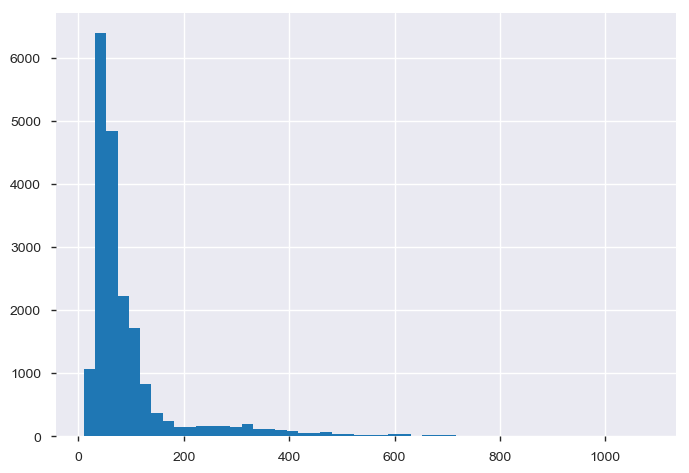

In [171]:
dataset['Appliances'].hist(bins=50)

2. Histograms of appliances to get the frequency

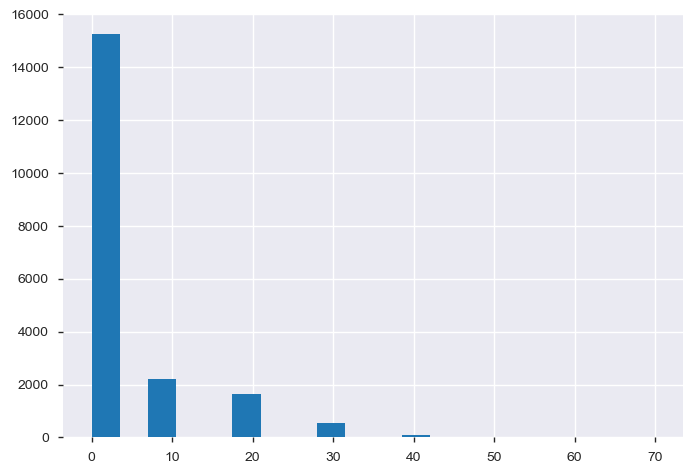

In [172]:
dataset['lights'].hist(bins=20)

In [173]:
dataset.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...    Month  Monthname  Day  Hour  \
0  19.79  44.730000  19.000000  ...        1    January   11    17   
1  19.79  44.790000  19.000000  ...        1    January   11    17   
2  19.79  44.933333  18.926667  ...        1    January   11    17   
3  19.79  45.000000  18.890000  ...        1    January   11    17   
4  19.79  45.000000  18.890000  ...        1    January   11    17   

       Perday      Time  DayoftheWeek  WeekStatus  Weekendstatus    NSM  
0  2016-01-11  17:00:00        Monday           0              0  61200  
1  2016-01-11  17:10:00        Monday           0              0  61800  
2  2016-01-11  17:20:00        Monday           0              0  62400  
3  2016-01-11  17:30:00        Monday           0              0  63000  
4  2016-01-11  17:40:00        Monday           0              0  63600  

[5 rows x 40 columns]

3. Energy consumption by Appliances and lights per day

In [174]:
energy_day_applight=dataset[['Perday','Appliances','lights']]

In [175]:
energy_day_applight.head()

Perday  Appliances  lights
0  2016-01-11          60      30
1  2016-01-11          60      30
2  2016-01-11          50      30
3  2016-01-11          50      40
4  2016-01-11          60      40

In [176]:
energy_day_applight.groupby(['Perday']).sum().iplot(
yTitle='Consumption in Watt-Hour',
   xTitle='Each Day',
   title='Perday Consumption in Appliances and Lights'
)

4. Energy consumption by Appliances and lights per month

In [177]:
energy_month_applight=dataset[['Monthname','Appliances','lights']]

In [178]:
energy_month_applight.head()

Monthname  Appliances  lights
0   January          60      30
1   January          60      30
2   January          50      30
3   January          50      40
4   January          60      40

In [179]:
energy_month_applight.groupby(['Monthname']).sum().iplot(
yTitle='Consumption in Watt-Hour',
   xTitle='Month Name',
   title='Monthly Consumption in Appliances and Lights',
    mode='lines+markers'
)

5. Energy consumption by Appliances and lights per day of the month

In [180]:
energy_dayofmonth_applight=dataset[['Day','Appliances','lights']]

In [181]:
energy_dayofmonth_applight.head()

Day  Appliances  lights
0   11          60      30
1   11          60      30
2   11          50      30
3   11          50      40
4   11          60      40

In [182]:
energy_dayofmonth_applight.groupby(['Day']).sum().iplot(
yTitle='Consumption in Watt-Hour',
   xTitle='Day of the Month',
   title='Day of the Month Consumption in Appliances and Lights',
    mode='lines+markers'
)

6. Energy consumption by Appliances and lights per hour

In [183]:
energy_hour_applight=dataset[['Hour','Appliances','lights']]

In [184]:
energy_hour_applight.head()

Hour  Appliances  lights
0    17          60      30
1    17          60      30
2    17          50      30
3    17          50      40
4    17          60      40

In [185]:
energy_hour_applight.groupby(['Hour']).sum().iplot(
yTitle='Consumption in Watt-Hour',
   xTitle='Hour',
   title='Day of the Month Consumption in Appliances and Lights',
    mode='lines+markers'
)

7. Energy consumption by appliances vs energy consumption by light

In [186]:
month_app_light=dataset[['Monthname','Appliances','lights']]

In [187]:
month_app_light.head()

Monthname  Appliances  lights
0   January          60      30
1   January          60      30
2   January          50      30
3   January          50      40
4   January          60      40

In [188]:
month_app_light=month_app_light.groupby(['Monthname']).sum()

In [189]:
month_app_light.reset_index(inplace=True)

In [190]:
month_app_light.head()

Monthname  Appliances  lights
0     April      427200   10440
1  February      421550   26490
2   January      283510   13800
3     March      432800   17480
4       May      362950    6820

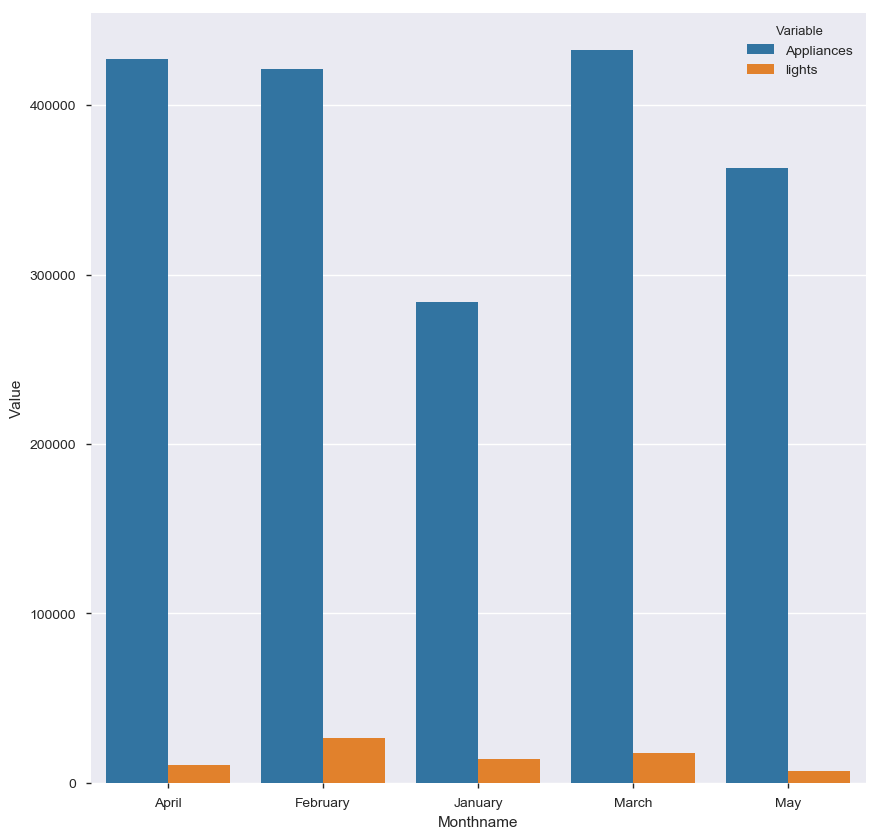

In [191]:
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = (
    month_app_light.set_index('Monthname')
      .stack()  # un-pivots the data 
      .reset_index()  
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)

sns.barplot(x='Monthname', y='Value', hue='Variable', data=tidy, ax=ax1)

sns.despine(fig)

### Observation:
1. The maximum appliance energy consumption was on 4th April, 2016. The maximum light energy consumption was on 1st February, 2016
2. The maximum appliance energy consumption was on March, 2016. The maximum light energy consumption was on February, 2016
3. The maximum appliance energy consumption was on 16th Hour of the Day. The maximum light energy consumption was on 15th Hour of the Day
4. The maximum appliance energy consumption was on 18th Day of the Month. The maximum light energy consumption was on 20th Day of the Month

8. Busiest Hour

In [192]:
hour_app_light=dataset[['Month','Monthname','Hour','Appliances','lights']]

In [193]:
hour_app_light.head()

Month Monthname  Hour  Appliances  lights
0      1   January    17          60      30
1      1   January    17          60      30
2      1   January    17          50      30
3      1   January    17          50      40
4      1   January    17          60      40

In [194]:
energy_hour_app_light=hour_app_light.groupby(['Month','Monthname','Hour']).sum()

In [195]:
energy_hour_app_light.reset_index(inplace=True)

In [196]:
energy_hour_app_light.head(20)

Month Monthname  Hour  Appliances  lights
0       1   January     0        6630     360
1       1   January     1        5870      70
2       1   January     2        4950       0
3       1   January     3        4930      10
4       1   January     4        4850      10
5       1   January     5        5080       0
6       1   January     6        5580     190
7       1   January     7       10360     520
8       1   January     8       15550     800
9       1   January     9       14740     760
10      1   January    10       14150     740
11      1   January    11       12050     590
12      1   January    12       13660     520
13      1   January    13       14100     270
14      1   January    14       10400     320
15      1   January    15        8260     220
16      1   January    16        9940     200
17      1   January    17       19330    1050
18      1   January    18       21360    1470
19      1   January    19       22990    1410

In [197]:
energy_hour_app_light['Total_Energy']=energy_hour_app_light['Appliances']+energy_hour_app_light['lights']

In [198]:
energy_hour_app_light.head(30)

Month Monthname  Hour  Appliances  lights  Total_Energy
0       1   January     0        6630     360          6990
1       1   January     1        5870      70          5940
2       1   January     2        4950       0          4950
3       1   January     3        4930      10          4940
4       1   January     4        4850      10          4860
5       1   January     5        5080       0          5080
6       1   January     6        5580     190          5770
7       1   January     7       10360     520         10880
8       1   January     8       15550     800         16350
9       1   January     9       14740     760         15500
10      1   January    10       14150     740         14890
11      1   January    11       12050     590         12640
12      1   January    12       13660     520         14180
13      1   January    13       14100     270         14370
14      1   January    14       10400     320         10720
15      1   January    15        8260     220          8480
16      1   January    16        9940     200         10140
17      1   January    17       19330    1050         20380
18      1   January    18       21360    1470         22830
19      1   January    19       22990    1410         24400
20      1   January    20       22190    1600         23790
21      1   January    21       16460    1100         17560
22      1   January    22       11780     790         12570
23      1   January    23        8300     800          9100
24      2  February     0        8950    1110         10060
25      2  February     1        8590     310          8900
26      2  February     2        8420     160          8580
27      2  February     3        8040     170          8210
28      2  February     4        8580     140          8720
29      2  February     5        8260     160          8420

Text(592.861,0.5,'Monthname')

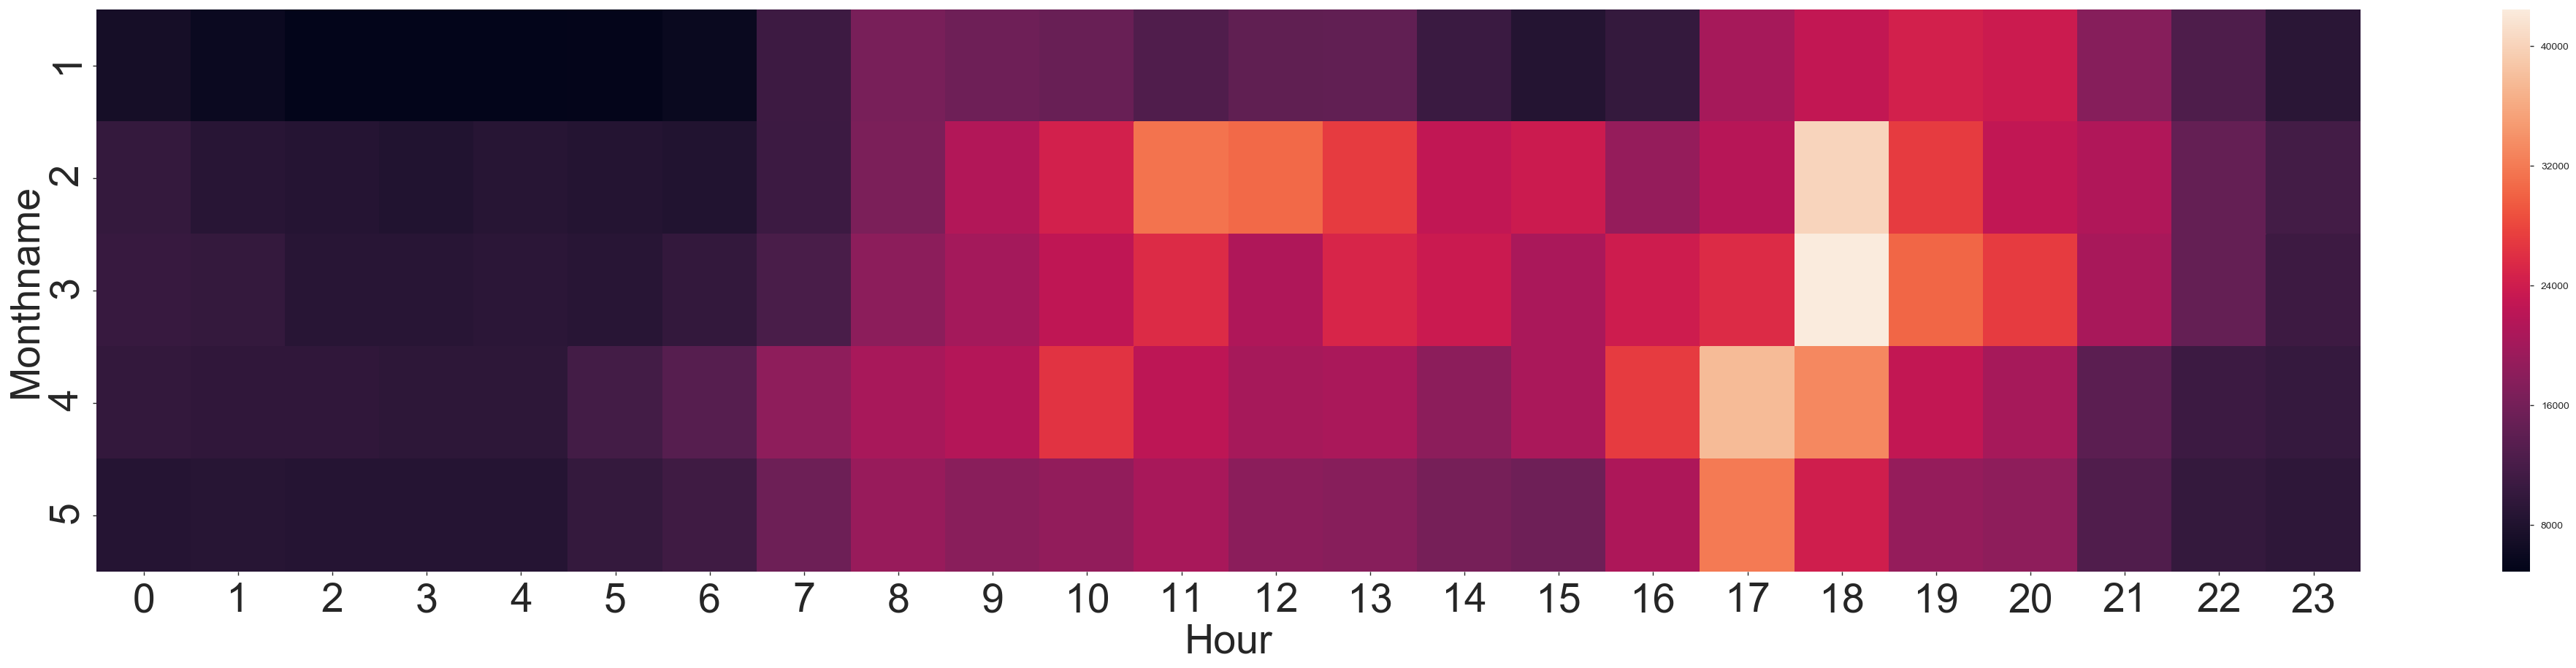

In [199]:
energy_hour_app_light_heatmap = energy_hour_app_light.pivot('Month','Hour','Total_Energy')
plt.figure(figsize=(50,10))
ax = sns.heatmap(energy_hour_app_light_heatmap)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.xlabel('Hour',fontsize=40)
plt.ylabel('Monthname',fontsize=40)


#### Determining the correlation between the data

In [200]:
dataset.corr()

Appliances    lights        T1      RH_1        T2      RH_2  \
Appliances       1.000000  0.197278  0.055447  0.086031  0.120073 -0.060465   
lights           0.197278  1.000000 -0.023528  0.106968 -0.005622  0.050985   
T1               0.055447 -0.023528  1.000000  0.164006  0.836834 -0.002509   
RH_1             0.086031  0.106968  0.164006  1.000000  0.269839  0.797535   
T2               0.120073 -0.005622  0.836834  0.269839  1.000000 -0.165610   
RH_2            -0.060465  0.050985 -0.002509  0.797535 -0.165610  1.000000   
T3               0.085060 -0.097393  0.892402  0.253230  0.735245  0.137319   
RH_3             0.036292  0.131161 -0.028550  0.844677  0.121497  0.678326   
T4               0.040281 -0.008859  0.877001  0.106180  0.762066 -0.047304   
RH_4             0.016965  0.114936  0.097861  0.880359  0.231563  0.721435   
T5               0.019760 -0.078745  0.885247  0.205797  0.720550  0.110409   
RH_5             0.006955  0.141233 -0.014782  0.303258  0.029595  0.250271   
T6               0.117638 -0.079029  0.654769  0.316141  0.801186 -0.009670   
RH_6            -0.083178  0.153756 -0.615045  0.245126 -0.580372  0.389933   
T7               0.025801 -0.135347  0.838705  0.021397  0.663660 -0.051422   
RH_7            -0.055642  0.035069  0.135182  0.801122  0.229212  0.690584   
T8               0.039572 -0.071458  0.825413 -0.030053  0.578191 -0.041023   
RH_8            -0.094039  0.012915 -0.006441  0.736196  0.068534  0.679777   
T9               0.010010 -0.157592  0.844777  0.115263  0.675535  0.054544   
RH_9            -0.051462 -0.008766  0.071756  0.764001  0.157346  0.676467   
T_out            0.099155 -0.074424  0.682846  0.340767  0.792255  0.033674   
Press_mm_hg     -0.034885 -0.010576 -0.150574 -0.293957 -0.133028 -0.255646   
RH_out          -0.152282  0.068543 -0.345481  0.274126 -0.505291  0.584911   
Windspeed        0.087122  0.060281 -0.087654  0.204932  0.052495  0.069190   
Visibility       0.000230  0.020038 -0.076210 -0.021057 -0.069721 -0.005368   
Tdewpoint        0.015353 -0.036322  0.571309  0.639106  0.582602  0.499152   
rv1             -0.011145  0.000521 -0.006203 -0.000699 -0.011087  0.006275   
rv2             -0.011145  0.000521 -0.006203 -0.000699 -0.011087  0.006275   
Year                  NaN       NaN       NaN       NaN       NaN       NaN   
Month           -0.011606 -0.179452  0.706305 -0.094048  0.533479 -0.097914   
Day              0.002366 -0.041895 -0.127088 -0.041397 -0.156913  0.037117   
Hour             0.216792  0.255346  0.178858  0.018594  0.254784 -0.183322   
WeekStatus       0.003060 -0.099828  0.001381 -0.053782  0.000602 -0.044249   
Weekendstatus    0.017437 -0.051404  0.010885 -0.018641 -0.005065 -0.001965   
NSM              0.217152  0.254993  0.178728  0.018531  0.254569 -0.183182   

                     T3      RH_3        T4      RH_4    ...     Tdewpoint  \
Appliances     0.085060  0.036292  0.040281  0.016965    ...      0.015353   
lights        -0.097393  0.131161 -0.008859  0.114936    ...     -0.036322   
T1             0.892402 -0.028550  0.877001  0.097861    ...      0.571309   
RH_1           0.253230  0.844677  0.106180  0.880359    ...      0.639106   
T2             0.735245  0.121497  0.762066  0.231563    ...      0.582602   
RH_2           0.137319  0.678326 -0.047304  0.721435    ...      0.499152   
T3             1.000000 -0.011234  0.852778  0.122737    ...      0.645886   
RH_3          -0.011234  1.000000 -0.140457  0.898978    ...      0.414387   
T4             0.852778 -0.140457  1.000000 -0.048650    ...      0.519471   
RH_4           0.122737  0.898978 -0.048650  1.000000    ...      0.616509   
T5             0.888169 -0.050062  0.871813  0.091812    ...      0.588362   
RH_5          -0.066355  0.375422 -0.076489  0.352591    ...      0.078175   
T6             0.686882  0.076833  0.652350  0.259047    ...      0.764242   
RH_6          -0.647672  0.514912 -0.703149  0.392178    ...     -0.260417   


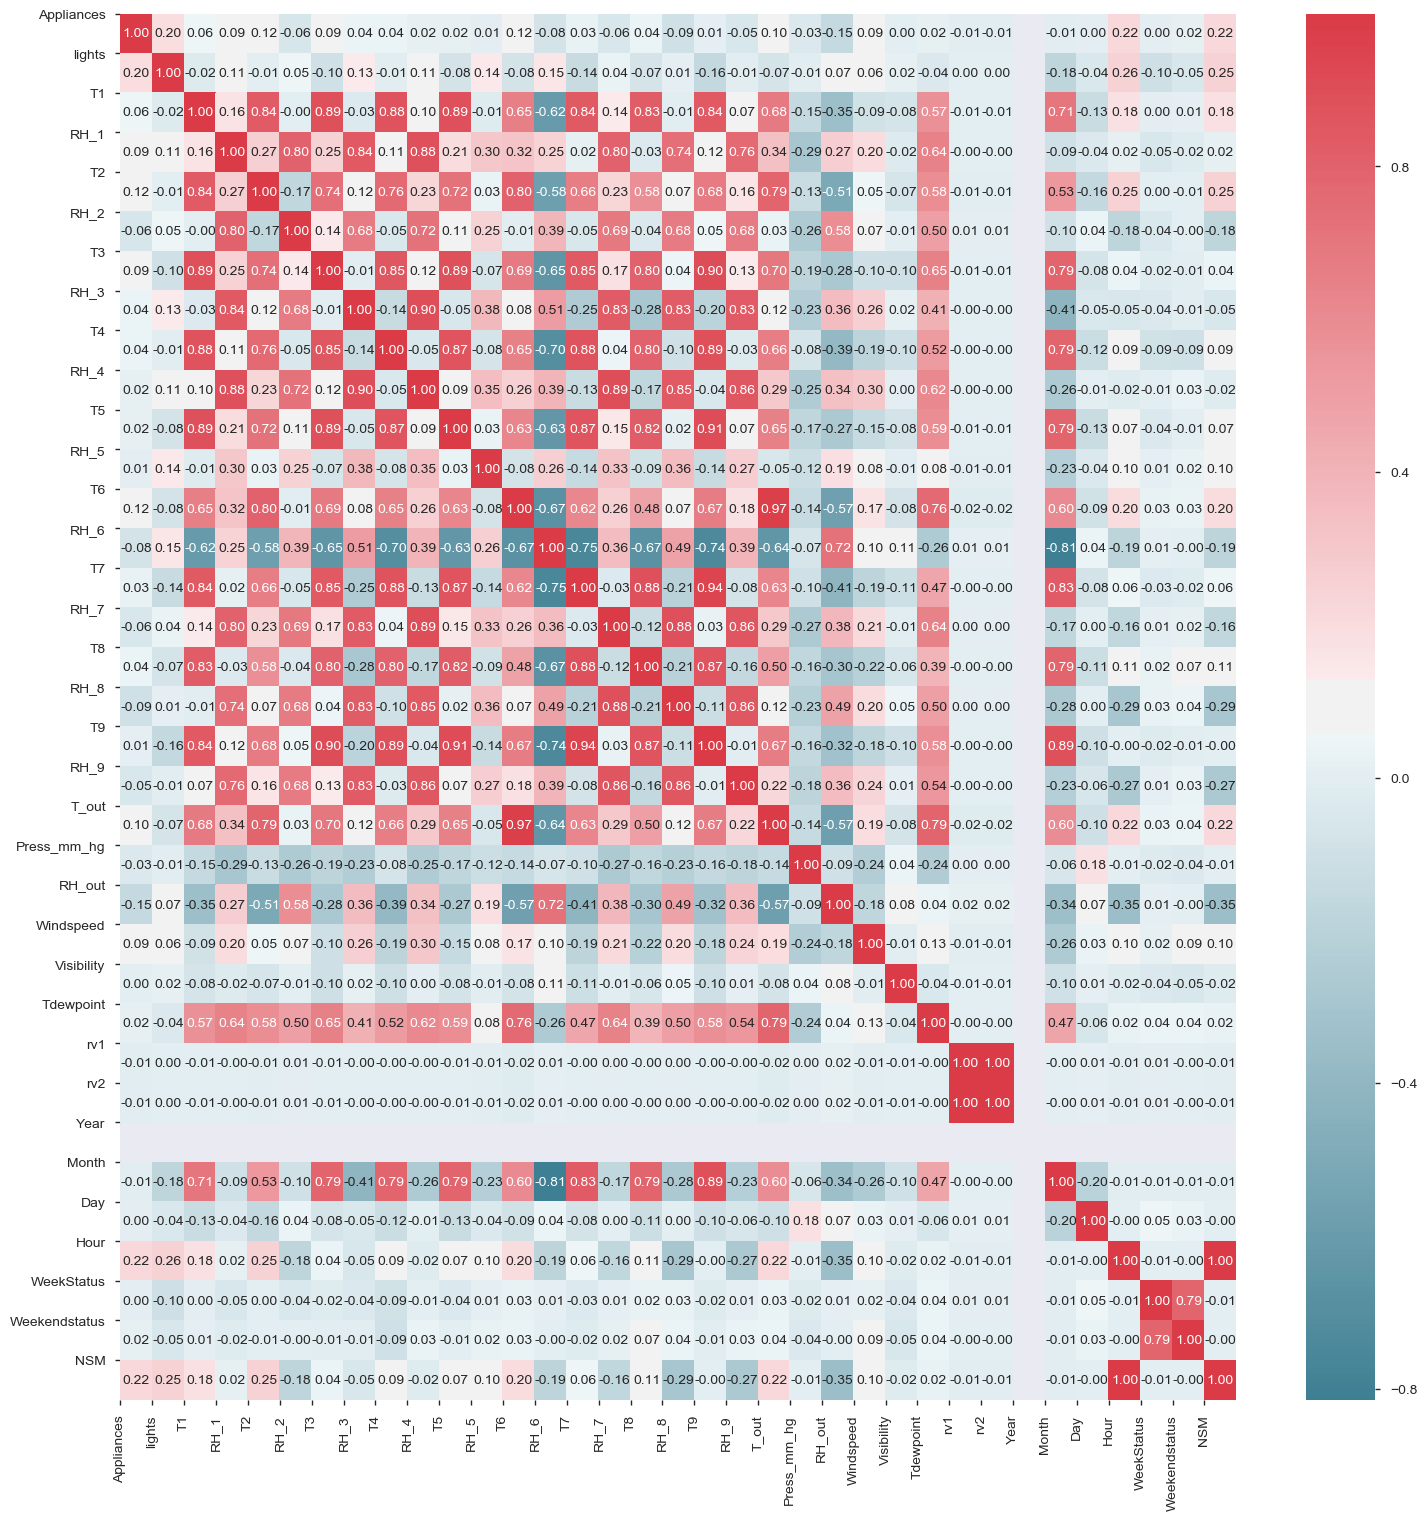

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...    Month  Monthname  Day  Hour  \
0  19.79  44.730000  19.000000  ...        1    January   11    17   
1  19.79  44.790000  19.000000  ...        1    January   11    17   
2  19.79  44.933333  18.926667  ...        1    January   11    17   
3  19.79  45.000000  18.890000  ...        1    January   11    17   
4  19.79  45.000000  18.890000  ...        1    January   11    17   

       Perday      Time  DayoftheWeek  WeekStatus  Weekendstatus    NSM  
0  2016-01-11  17:00:00        Monday           0              0  61200  
1  2016-01-11  17:10:00        Monday           0              0  61800  
2  2016-01-11  17:20:00        Monday           0              0  62400  
3  2016-01-11  17:30:00        Monday           0              0  63000  
4  2016-01-11  17:40:00        Monday           0              0  63600  

[5 rows x 40 columns]

In [201]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(18, 18))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

dataset.head()

In [202]:
pandas_profiling.ProfileReport(dataset)

### Observations: 
1. As you can see from the data_profiling method, some of the parameters should be rejected as they are very correlated with other paramenters(rv2, T9, T_out) or just have one value throughout the column(Year)
2. Lights column have a lot of zeros. Percentage of zero values are 77.3%. 